## SuperMario Frames Preprocessing

In [1]:
import gym_super_mario_bros as gym
import matplotlib.pyplot as plt

env = gym.make('SuperMarioBros-v0')
state = env.reset()
plt.imshow(state)
plt.show()
print(f'image of size {state.shape[0]}x{state.shape[1]}')

<Figure size 640x480 with 1 Axes>

image of size 240x256


The idea is to highlight Mario, cut the top part of the frame and make background darker

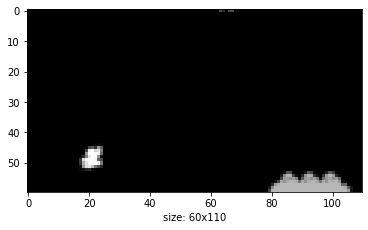

In [9]:
import torchvision
from torchvision import transforms
import numpy as np

def preprocess(img):
    """
    Preprocess a frame
    """
    mario_dress = 240 #, 56, 0]
    mario_skin  = 252 #, 16, 68]
    mario_other = 172 #, 140, 0]
    background  = 104
    bush_color2 = 168
    bush_color1 = 184

    state_ = state[70:208, :, 0]  # crop and red signal
    state_[state_==mario_dress] = 255
    state_[state_==mario_skin]  = 255
    state_[state_==mario_other] = 255
    state_[state_==background]  = 0

    state_ = np.array(transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([60, 110]), 
    ])(state_))
    
    return state_

state_ = preprocess(state)
plt.imshow(state_, cmap='gray')
plt.xlabel(f'size: {state_.shape[0]}x{state_.shape[1]}')
plt.show()

And now a execution seen by neural network

In [5]:
import time
from IPython.display import clear_output

env = gym.make('SuperMarioBros-v0')

state = env.reset()
done = False
try:
    while not done:
        state, _, done, _ = env.step(env.action_space.sample())
        clear_output(wait=True)
        plt.imshow(preprocess(state), cmap='gray')
        plt.show()
except KeyboardInterrupt:
    print('stopped')

stopped
